# Case Study: Simpson's Paradoxon

### Background
Most states in the USA provide services and support for individuals with intellectual disabilities and children with developmental disabilities. The agency through which the State of California serves the developmentally-disabled population is the California Department of Developmental Services (DDS). A few years ago, a discrimination lawsuit was filed against the California DDS claiming that White Non-Hispanics were receiving more funding than Hispanics.

### Task
For this case study, you will take on the role of a consulting team of statisticians investigating whether the discrimination allegations are justified. Please analyze the data and come up with a plot that answers the question **"Is there any ethnic bias regarding the expenditures?"** in a comprehensible and viusally appealing way.

# Data 

This data set at hand contains data regarding the allocation of funding from the Department of Developmental Services to developmentally-disabled individuals in California in 2014.

The variables included are:

* **Id** [int] -  Unique identification code for each developmentally-disabled resident.
* **Age Cohort** [String] - Age group (0-5, 6-12, 13-17, 18-21, 22-50, 51+) of the resident.
* **Age** [int] - Exact age of the resident.
* **Gender** [String] - Gender of the resident.
* **Expenditures** [int] - Annual expenditures the resident receives from the State to pay for services such as respite for their families, psychological services, medical expenses, transportation, and costs related to housing.
* **Ethnicity** [String] - Ethnic group of the residnet.

## Step 1. Import Python Modules

Import the modules that you'll be using in this project.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
# Add additional packages that you want to import below.

## Step 2. Load The Data

Load the dataset `californiaDDSDataV2.csv` into a DataFrames so that it can be visualized.

Hint: Use `pd.read_csv()`

In [2]:
# import data
df = pd.read_csv('../data/californiaDDSDataV2.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/californiaDDSDataV2.csv'

## Step 3. Examine The Data

Please analyze, prepare, and plot the provided data, and investigate the discrimination allegations in a meaningful way. 

In [3]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [4]:
df.describe()

,Id,Age,Expenditures
count,1000.000000,1000.000000,1000.000000
mean,54662.846000,22.800000,18065.786000
std,25643.673401,18.462038,19542.830884
min,10210.000000,0.000000,222.000000
25%,31808.750000,12.000000,2898.750000
50%,55384.500000,18.000000,7026.000000
75%,76134.750000,26.000000,37712.750000
max,99898.000000,95.000000,75098.000000


In [5]:
df['Expenditures'] = pd.to_numeric(df['Expenditures'], errors='coerce')
expenditure_ethnicities = (
      df.groupby('Ethnicity', as_index=False)['Expenditures'].mean()
        .sort_values('Expenditures')
  )

print(expenditure_ethnicities)

            Ethnicity  Expenditures
6               Other   3316.500000
4          Multi Race   4456.730769
3            Hispanic  11065.569149
1               Asian  18392.372093
2               Black  20884.593220
7  White not Hispanic  24697.548628
0     American Indian  36438.250000
5     Native Hawaiian  42782.333333


In [6]:
gender_averages = df.loc[:,['Gender', 'Expenditures']].groupby('Gender').mean().sort_values('Gender')
print(gender_averages)

        Expenditures
Gender              
Female  18129.606362
Male    18001.195171


In [7]:
# Group the data by age cohort and calculate the average expenditures per age cohort
agecohort_averages = df.loc[:,['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

# Print the age cohort averages
print(agecohort_averages)

            Expenditures
Age Cohort              
0 to 5       1415.280488
6 to 12      2226.862857
13 to 17     3922.613208
18 to 21     9888.537688
22 to 50    40209.283186
51+         53521.896226


C:\Users\Theresa\AppData\Local\Temp\ipykernel_32956\75760094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Ethnicity", y="Expenditures", kind="box", palette="viridis")


<Figure size 1000x600 with 0 Axes>

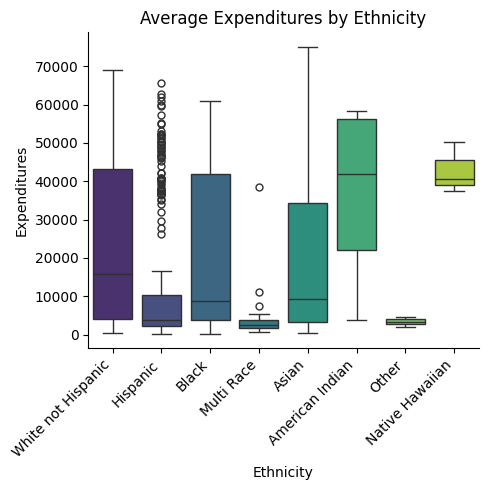

In [8]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Ethnicity", y="Expenditures", kind="box", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Average Expenditures by Ethnicity')
plt.tight_layout()
plt.show()

## Step 4. Final Plot

Please plot your final graph here to be judged by the other teams. 

<Figure size 2000x600 with 0 Axes>

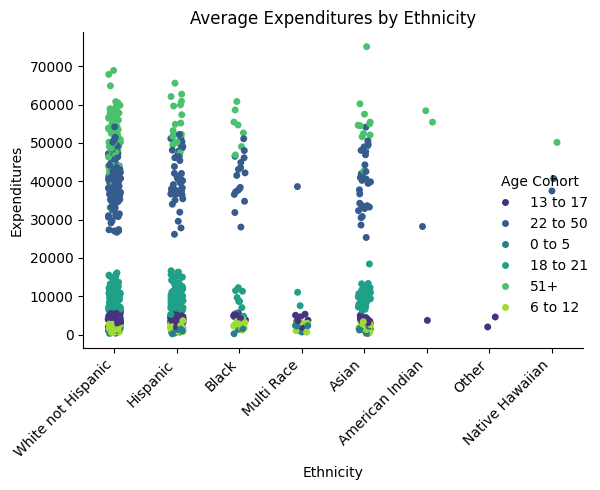

In [9]:
plt.figure(figsize=(20, 6))
sns.catplot(data=df, x='Ethnicity', y='Expenditures', palette='viridis', hue="Age Cohort")
plt.xticks(rotation=45, ha='right')
plt.title('Average Expenditures by Ethnicity')
plt.tight_layout()
plt.show()

In [10]:
# your final plot